<a href="https://colab.research.google.com/github/shubham5027/Convolutional-Neural-Networks/blob/main/CNN_Model_MNIST_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from keras.layers import Dense, MaxPooling2D,Conv2D,Flatten
from keras.models import Sequential
import numpy as np
import pandas as pd
from keras.callbacks import EarlyStopping
import tensorflow  as tf

In [2]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
x_train=x_train.reshape(-1,28,28,1).astype('float32')/255
x_test=x_test.reshape(-1,28,28,1).astype('float32')/255

In [46]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [4]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

callbacks=EarlyStopping(patience=5)
history=model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),callbacks=callbacks)

Epoch 1/50
1875/1875 [==============================] - 14s 5ms/step - loss: 0.1423 - accuracy: 0.9570 - val_loss: 0.0476 - val_accuracy: 0.9838
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0471 - accuracy: 0.9854 - val_loss: 0.0365 - val_accuracy: 0.9868
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0337 - accuracy: 0.9894 - val_loss: 0.0352 - val_accuracy: 0.9892
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0256 - accuracy: 0.9918 - val_loss: 0.0421 - val_accuracy: 0.9869
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0191 - accuracy: 0.9942 - val_loss: 0.0374 - val_accuracy: 0.9887
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0142 - accuracy: 0.9955 - val_loss: 0.0277 - val_accuracy: 0.9911
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0116 - accuracy: 0.9962 - val_loss: 0.0326 - val_accuracy

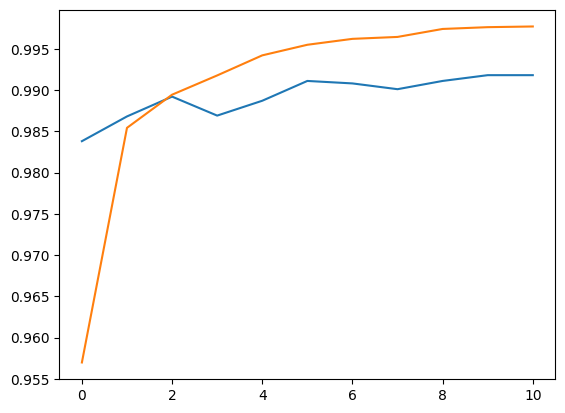

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

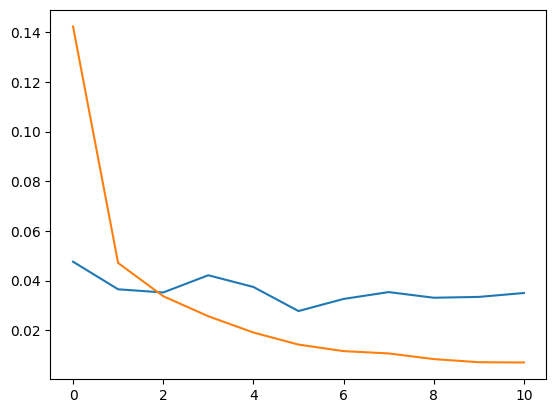

In [8]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])